In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_52766_Z')

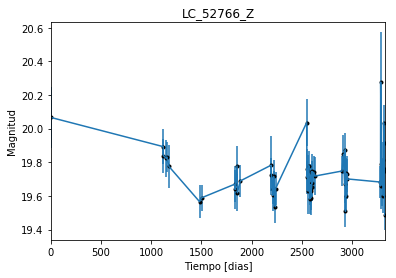

In [3]:
data = np.genfromtxt('LC_52766_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_52766_Z')

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

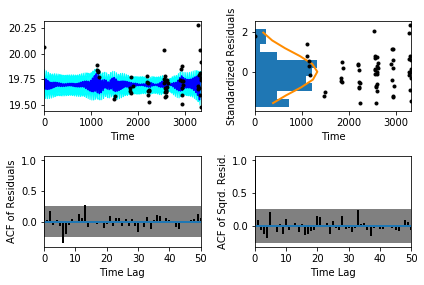

In [6]:
sample.assess_fit()

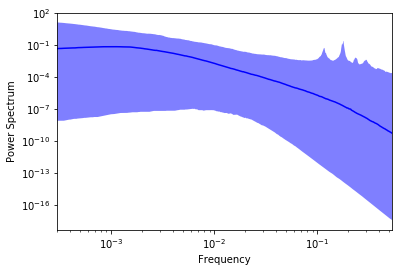

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_52766_Z')

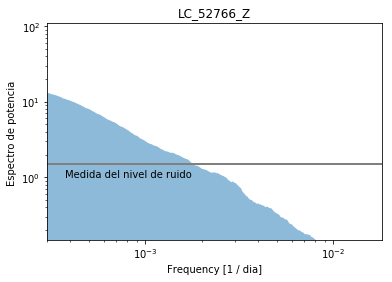

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_52766_Z')

Text(0.5,1,'Prediccion , valor esperado LC_52766_Z')

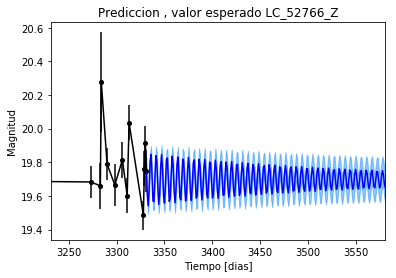

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_52766_Z')

Text(0.5,1,'Prediccion, Caminos simulados LC_52766_z')

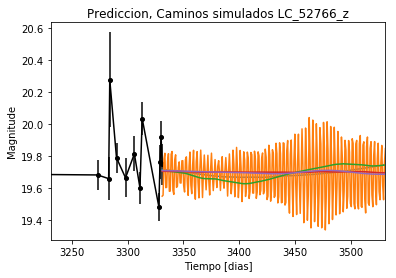

In [12]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_52766_z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_52766_z')

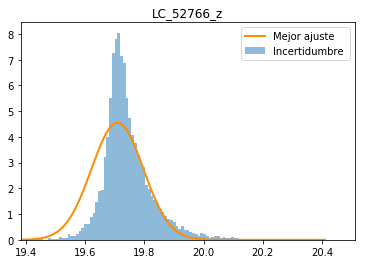

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_52766_z')

Text(0.5,1,'Interpolacion, camino simulado LC_52766_Z')

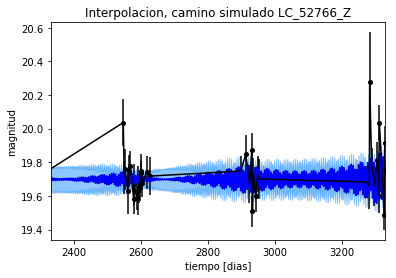

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_52766_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_52766_Z')

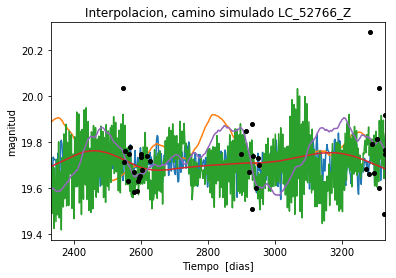

In [15]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_52766_Z')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 660.882703921
Median: 0.00585422068813
Standard deviation: 0.16824274717
68% credibility interval: [ 0.0006968   0.11147032]
95% credibility interval: [  3.31397609e-04   6.91956399e-01]
99% credibility interval: [  3.06299331e-04   9.63522556e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 413.513752187
Median: 0.00297385458991
Standard deviation: 0.0804969720212
68% credibility interval: [ 0.00055242  0.04257356]
95% credibility interval: [ 0.0003262   0.24821942]
99% credibility interval: [  3.05596854e-04   5.72250675e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 420.554830591
Median: 0.0116010675674
Standard 

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 408.05148601
Median: 69.3748437803
Standard deviation: 1.84135356649
68% credibility interval: [ 67.71627058  70.56792757]
95% credibility interval: [ 65.15952619  73.08976286]
99% credibility interval: [ 63.3786423   73.99684433]


In [19]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 344.537626147
Median: 0.511643091895
Standard deviation: 2.18791119175
68% credibility interval: [ 0.05049191  3.29354232]
95% credibility interval: [ 0.0130682   7.49300376]
99% credibility interval: [  8.74777538e-03   1.27917856e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 235.328312927
Median: 1.33115640777
Standard deviation: 14.496289272
68% credibility interval: [  0.04301106  18.43047291]
95% credibility interval: [  1.2

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 762.328299669
Median: 1.16236232608e-07
Standard deviation: 1.36865980526e+77
68% credibility interval: [  1.14911685e-44   1.73810517e+21]
95% credibility interval: [  7.01831811e-126   5.90958096e+071]
99% credibility interval: [  2.00390321e-174   1.27594005e+077]


In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1226.46612323
Median: 19.7097010201
Standard deviation: 0.0359977192177
68% credibility interval: [ 19.68811193  19.73497177]
95% credibility interval: [ 19.66237965  19.79599384]
99% credibility interval: [ 19.62385453  19.88518174]


In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 661.625433704
Median: 0.123425311847
Standard deviation: 0.30059850138
68% credibility interval: [ 0.          0.62904103]
95% credibility interval: [ 0.          0.98570551]
99% credibility interval: [ 0.          1.05194452]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 661.625433704
Median: 0.123425311847
Standard deviation: 0.30059850138
68% credibility interval: [ 0.          0.62904103]
95% credibility interval: [ 0.          0.98570551]
99% credibility interval: [ 0.          1.05194452]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 193.080899951
Median: 0.0
Standard deviation: 0.125897914267
68% credibili

In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 408.05148601
Median: 69.3748437803
Standard deviation: 1.84135356649
68% credibility interval: [ 67.71627058  70.56792757]
95% credibility interval: [ 65.15952619  73.08976286]
99% credibility interval: [ 63.3786423   73.99684433]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2405.80431275
Median: 0.00306950768986
Standard deviation: 0.00954452421219
68% credibility interval: [ 0.00057776  0.00882144]
95% credibility interval: [  1.85767057e-05   2.54678577e-02]
99% credibility interval: [  6.05651636e-07   5.85331372e-02]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1433.64783987
Median: 1.06983321607
Standard deviation: 0.172324263964
68% credibility interval: [ 0.9121354   1.25736293]
95% credibility interval: [ 0.79250852  1.45534023]
99% credibility interval: [ 0.72288641  1.60853103]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 150.41795685
Median: 4.3341623209e-05
Standard deviation: 3.84139965563
68% credibility interval: [  9.94774520e-24   2.62383333e-02]
95% credibility interval: [  4.71119853e-75   1.15707170e+00]
99% credibility interval: [  2.20325390e-80   4.14571424e+01]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 660.882703921
Median: (-0.0367831534126-0.0412117248597j)
Standard deviation: 2.16441900358
68% credibility interval: [-0.70038868+0.j         -0.00437814-1.07059699j]
95% credibility interval: [ -4.34769028e+00+0.j          -2.08223259e-03-5.20086337j]
99% credibility interval: [ -6.05399077e+00+0.j          -1.92453546e-03-5.10945789j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 413.513752187
Median: (-0.018685279465+1.16781633687j)
Standard deviation: 1.95526449062
68% credibility interval: [-0.26749757+4.10496854j -0.00347094+0.j        ]
95% credibility interval: [-1.55960859+0.12747295j -0.00204960+1.10389737j]
99% credibility interval: [ -3.59555703e+00+3.33619402j  -1.92012167e-03+1.10961365j]
Posterior sum